Importing some libaries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data colllection and Processing

In [ ]:
#loadind the csv file to pandas datafile
titanic_data = pd.read_csv('/content/tested.csv')


In [ ]:
#printing the first 5 rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#  number of rows and colums in this dataset
titanic_data.shape

(418, 12)

In [ ]:
#getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#check the number of missing value in each colum
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the missing values

In [ ]:
#drop the cabin column from the dataframe
titanic_data = titanic_data.drop(columns = 'Cabin' , axis = 1)

In [ ]:
#replaing the missing value in the age column fron mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)

In [ ]:
#finding the mode value of fare column
print(titanic_data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [ ]:
print(titanic_data['Fare'].mode()[0])

7.75


In [ ]:
#replacing the missing value in "Fare" column with mode value
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace = True)

In [ ]:
#check the number of the missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [ ]:
#getting some statical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data Visualization

In [ ]:
sns.set()

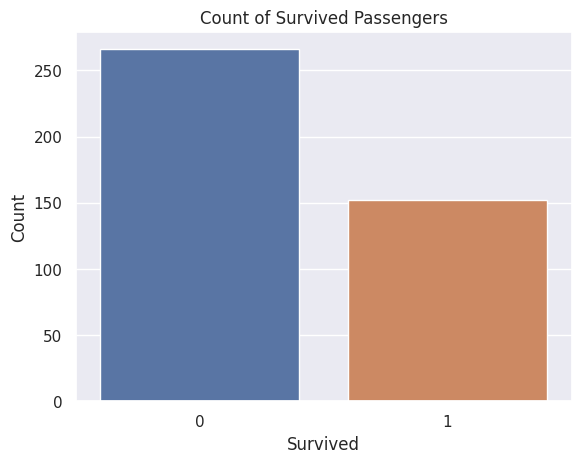

In [ ]:
#making a count plot for 'Survived'column

# Assuming 'Survived' is a column in your DataFrame 'titanic_data'
sns.countplot(x='Survived', data=titanic_data)

# Optional: Add labels and a title to the plot
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survived Passengers')

# Show the plot
plt.show()


In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

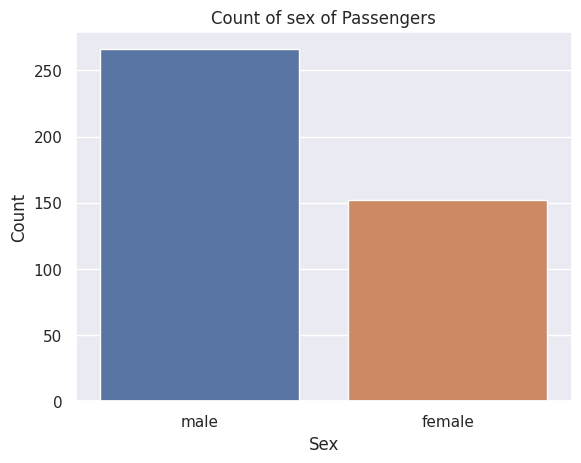

In [ ]:
#making a count plot for 'Sex'column

# Assuming 'Survived' is a column in your DataFrame 'titanic_data'
sns.countplot(x='Sex', data=titanic_data)

# Optional: Add labels and a title to the plot
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of sex of Passengers')

# Show the plot
plt.show()


<Axes: xlabel='Sex', ylabel='count'>

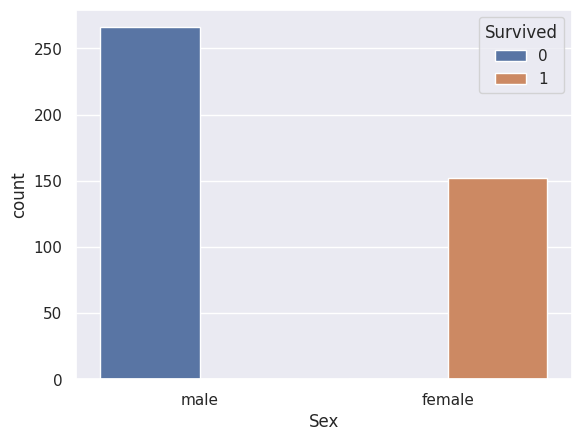

In [ ]:
#number of survivors gender wise
sns.countplot(x='Sex', hue='Survived' , data=titanic_data )

<Axes: xlabel='Pclass', ylabel='count'>

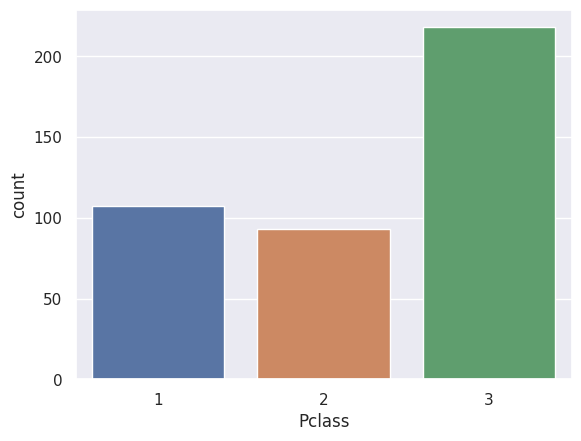

In [ ]:
#number of survivors Pclass wise
sns.countplot(x='Pclass' , data=titanic_data )

<Axes: xlabel='Pclass', ylabel='count'>

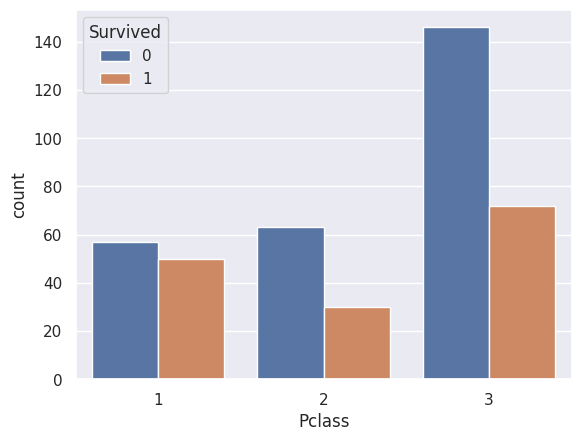

In [ ]:
#number of survivors pcalss wise
sns.countplot(x='Pclass', hue='Survived' , data=titanic_data )